<h1>Capstone 1</h1>
<h2>White Wine Quality, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>October 18, 2020</h4>
<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)

df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values.</p>

In [3]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    
    
   

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [5]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
sm.__version__

'0.12.0'

## Model 1


In [7]:
ym1 = df.quality
Xm1 = df.drop(['quality'],axis=1)
from sklearn.model_selection import train_test_split
Xm1_train, Xm1_test, ym1_train, ym1_test = train_test_split(Xm1, ym1, test_size=0.25, random_state=101)
Xm1_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2133,8.3,0.24,0.27,2.1,0.030,22.0,162.0,0.991400,2.99,0.68,11.9
4628,6.1,0.19,0.37,2.6,0.041,24.0,99.0,0.991530,3.18,0.50,10.9
176,7.2,0.32,0.47,5.1,0.044,19.0,65.0,0.991000,3.03,0.41,12.6
4545,6.3,0.25,0.53,1.8,0.021,41.0,101.0,0.989315,3.19,0.31,13.0
1480,7.2,0.08,0.49,1.3,0.050,18.0,148.0,0.994500,3.46,0.44,10.2


In [8]:
Xm1_train.shape

(2963, 11)

In [9]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm1_train,ym1_train)
print('Estimated intercept coefficient:',lm1.intercept_)
print ('Number of coefficients:', len(lm1.coef_))
coeffm1_df = pd.DataFrame(lm1.coef_,Xm1.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 213.71187413854378
Number of coefficients: 11


,Coefficient
fixed_acidity,0.170009
volatile_acidity,-1.839812
citric_acid,0.010424
residual_sugar,0.101896
chlorides,-4.143132
free_sulfur_dioxide,0.005319
total_sulfur_dioxide,0.000059
density,-215.175056
pH,1.056183
sulphates,0.671797


In [10]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym1, Xm1 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm1 = pd.DataFrame()
vifm1['VIF'] = [variance_inflation_factor(Xm1.values, i) for i in range(Xm1.shape[1])]
vifm1['variable'] = Xm1.columns

#view VIF for each explanatory variable 
vifm1

,VIF,variable
0,5.605979e+06,Intercept
1,2.961956e+00,fixed_acidity
2,1.147359e+00,volatile_acidity
3,1.113266e+00,citric_acid
4,1.887978e+01,residual_sugar
5,1.561963e+00,chlorides
6,1.830994e+00,free_sulfur_dioxide
7,2.447938e+00,total_sulfur_dioxide
8,4.763349e+01,density
9,2.364470e+00,pH


In [11]:
predictions_m1 = lm1.predict(Xm1_test)

**Predicted vs. Actual**

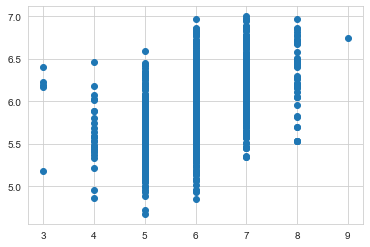

In [12]:
plt.scatter(ym1_test,predictions_m1)

**Residual Histogram**

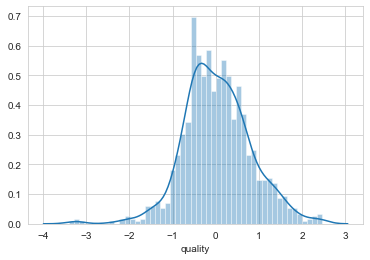

In [13]:
sns.distplot((ym1_test-predictions_m1),bins=50);

In [14]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym1_test, predictions_m1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym1_test, predictions_m1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym1_test, predictions_m1)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym1_test, predictions_m1))
print('Explained Variance:', metrics.explained_variance_score(ym1_test, predictions_m1))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym1_test, predictions_m1))
print('Median Absolute Error:', metrics.median_absolute_error(ym1_test, predictions_m1))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym1_test, predictions_m1))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym1_test, predictions_m1))



R-squared: 0.22389147221980876
Mean Squared Error (MSE): 0.6139035119531284
Root Mean Squared Error (RMSE): 0.7835199499394565
Log Mean Squared Error: 0.013275311421153606
Explained Variance: 0.2253984551009861
Mean Absolute Error (MAE): 0.6049732149679001
Median Absolute Error: 0.4957935867078902
Poisson Deviance: 0.10419333210925862
Mean Gamma Deviance: 0.018004481515094452


## Model 2 -  Drop Density For High VIF

In [15]:
ym2 = df.quality
Xm2 = df.drop(['quality','density'],axis=1)
from sklearn.model_selection import train_test_split
Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(Xm2, ym2, test_size=0.25, random_state=101)
Xm2_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
2133,8.3,0.24,0.27,2.1,0.030,22.0,162.0,2.99,0.68,11.9
4628,6.1,0.19,0.37,2.6,0.041,24.0,99.0,3.18,0.50,10.9
176,7.2,0.32,0.47,5.1,0.044,19.0,65.0,3.03,0.41,12.6
4545,6.3,0.25,0.53,1.8,0.021,41.0,101.0,3.19,0.31,13.0
1480,7.2,0.08,0.49,1.3,0.050,18.0,148.0,3.46,0.44,10.2


In [16]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(Xm2_train,ym2_train)
print('Estimated intercept coefficient:',lm2.intercept_)
print ('Number of coefficients:', len(lm2.coef_))
coeffm2_df = pd.DataFrame(lm2.coef_,Xm2.columns,columns=['Coefficient'])
coeffm2_df

Estimated intercept coefficient: 1.3903349223169723
Number of coefficients: 10


,Coefficient
fixed_acidity,0.008910
volatile_acidity,-1.881699
citric_acid,-0.060849
residual_sugar,0.025862
chlorides,-6.385405
free_sulfur_dioxide,0.006733
total_sulfur_dioxide,-0.000848
pH,0.368016
sulphates,0.392532
alcohol,0.343402


In [17]:
predictions_m2 = lm2.predict(Xm2_test)

**Predicted vs. Actual**

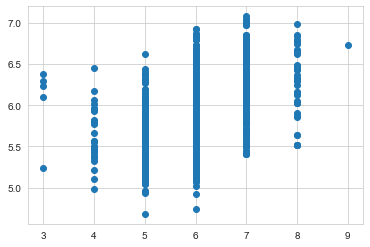

In [18]:
plt.scatter(ym2_test,predictions_m2)

**Residual Histogram**

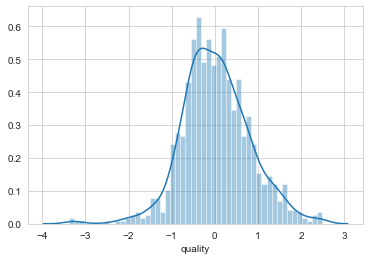

In [19]:
sns.distplot((ym2_test-predictions_m2),bins=50);

In [20]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym2_test, predictions_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym2_test, predictions_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym2_test, predictions_m2)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym2_test, predictions_m2))
print('Explained Variance:', metrics.explained_variance_score(ym2_test, predictions_m2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym2_test, predictions_m2))
print('Median Absolute Error:', metrics.median_absolute_error(ym2_test, predictions_m2))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym2_test, predictions_m2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym2_test, predictions_m2))



R-squared: 0.21768259970766723
Mean Squared Error (MSE): 0.6188147434420735
Root Mean Squared Error (RMSE): 0.7866477886844109
Log Mean Squared Error: 0.013367986693335372
Explained Variance: 0.21874881618278585
Mean Absolute Error (MAE): 0.6043141629330466
Median Absolute Error: 0.493886427466935
Poisson Deviance: 0.10493151527669616
Mean Gamma Deviance: 0.018114301221470532


In [21]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym2, Xm2 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm2 = pd.DataFrame()
vifm2['VIF'] = [variance_inflation_factor(Xm2.values, i) for i in range(Xm2.shape[1])]
vifm2['variable'] = Xm2.columns

#view VIF for each explanatory variable 
vifm2

,VIF,variable
0,1212.912867,Intercept
1,1.272660,fixed_acidity
2,1.145174,volatile_acidity
3,1.106216,citric_acid
4,1.530861,residual_sugar
5,1.502001,chlorides
6,1.773362,free_sulfur_dioxide
7,2.277433,total_sulfur_dioxide
8,1.249977,pH
9,1.055027,sulphates


## Backward Elimination Method to create subsequent models

## Model 3: Drop Total Sulfur Dioxide


In [22]:
ym3 = df.quality
Xm3 = df.drop(['quality','density','total_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm3_train, Xm3_test, ym3_train, ym3_test = train_test_split(Xm3, ym3, test_size=0.25, random_state=101)
Xm3_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,pH,sulphates,alcohol
2133,8.3,0.24,0.27,2.1,0.030,22.0,2.99,0.68,11.9
4628,6.1,0.19,0.37,2.6,0.041,24.0,3.18,0.50,10.9
176,7.2,0.32,0.47,5.1,0.044,19.0,3.03,0.41,12.6
4545,6.3,0.25,0.53,1.8,0.021,41.0,3.19,0.31,13.0
1480,7.2,0.08,0.49,1.3,0.050,18.0,3.46,0.44,10.2


In [23]:
Xm3_train.shape

(2963, 9)

In [24]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(Xm3_train,ym3_train)
print('Estimated intercept coefficient:',lm3.intercept_)
print ('Number of coefficients:', len(lm3.coef_))
coeffm1_df = pd.DataFrame(lm3.coef_,Xm3.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 1.3968562637233832
Number of coefficients: 9


,Coefficient
fixed_acidity,0.004799
volatile_acidity,-1.970698
citric_acid,-0.081952
residual_sugar,0.025393
chlorides,-6.789113
free_sulfur_dioxide,0.005541
pH,0.346199
sulphates,0.366498
alcohol,0.350826


In [25]:
predictions_m3 = lm3.predict(Xm3_test)

**Predicted vs. Actual**

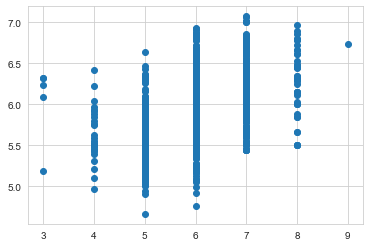

In [26]:
plt.scatter(ym3_test,predictions_m3)

**Residual Histogram**

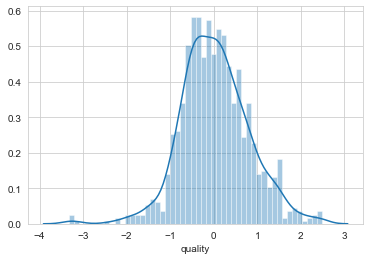

In [27]:
sns.distplot((ym3_test-predictions_m3),bins=50);

In [28]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym3_test, predictions_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym3_test, predictions_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym3_test, predictions_m3)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym3_test, predictions_m3))
print('Explained Variance:', metrics.explained_variance_score(ym3_test, predictions_m3))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym3_test, predictions_m3))
print('Median Absolute Error:', metrics.median_absolute_error(ym3_test, predictions_m3))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym3_test, predictions_m3))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym3_test, predictions_m3))



R-squared: 0.21797710213951338
Mean Squared Error (MSE): 0.6185817913861206
Root Mean Squared Error (RMSE): 0.7864997084463036
Log Mean Squared Error: 0.013350735905662957
Explained Variance: 0.21919121741211556
Mean Absolute Error (MAE): 0.6043602748868268
Median Absolute Error: 0.4932854991263449
Poisson Deviance: 0.10486525776832015
Mean Gamma Deviance: 0.018098459547516828


## Model 4: Drop Free Sulfur Dioxide

In [29]:
ym4 = df.quality
Xm4 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm4_train, Xm4_test, ym4_train, ym4_test = train_test_split(Xm4, ym4, test_size=0.25, random_state=101)
Xm4_train.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
2133,8.3,0.24,0.27,2.1,0.030,2.99,0.68,11.9
4628,6.1,0.19,0.37,2.6,0.041,3.18,0.50,10.9
176,7.2,0.32,0.47,5.1,0.044,3.03,0.41,12.6
4545,6.3,0.25,0.53,1.8,0.021,3.19,0.31,13.0
1480,7.2,0.08,0.49,1.3,0.050,3.46,0.44,10.2


In [30]:
Xm4_train.shape

(2963, 8)

In [31]:
lm4 = LinearRegression()
lm4.fit(Xm4_train,ym4_train)
print('Estimated intercept coefficient:',lm4.intercept_)
print ('Number of coefficients:', len(lm4.coef_))
coeffm4_df = pd.DataFrame(lm4.coef_,Xm4.columns,columns=['Coefficient'])
coeffm4_df

Estimated intercept coefficient: 1.587977993020373
Number of coefficients: 8


,Coefficient
fixed_acidity,-0.001593
volatile_acidity,-2.008352
citric_acid,0.012040
residual_sugar,0.030545
chlorides,-6.542456
pH,0.358819
sulphates,0.405405
alcohol,0.343530


In [32]:
predictions_m4 = lm4.predict(Xm4_test)

**Predicted vs. Actual**

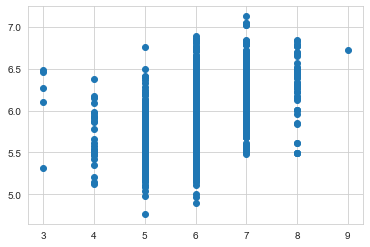

In [33]:
plt.scatter(ym1_test,predictions_m4)

**Residual Histogram**

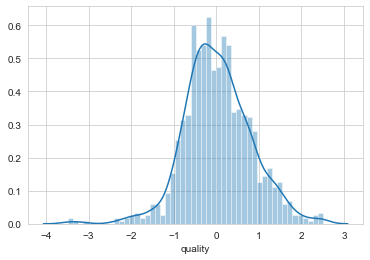

In [34]:
sns.distplot((ym4_test-predictions_m4),bins=50);

## Model 5: Drop Fixed Acidity


In [35]:
ym5 = df.quality
Xm5 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm5_train, Xm5_test, ym5_train, ym5_test = train_test_split(Xm5, ym5, test_size=0.25, random_state=101)
Xm5_train.head()




,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
2133,0.24,0.27,2.1,0.030,2.99,0.68,11.9
4628,0.19,0.37,2.6,0.041,3.18,0.50,10.9
176,0.32,0.47,5.1,0.044,3.03,0.41,12.6
4545,0.25,0.53,1.8,0.021,3.19,0.31,13.0
1480,0.08,0.49,1.3,0.050,3.46,0.44,10.2


In [36]:
Xm5_train.shape

(2963, 7)

In [37]:
from sklearn.linear_model import LinearRegression
lm5 = LinearRegression()
lm5.fit(Xm5_train,ym5_train)
print('Estimated intercept coefficient:',lm5.intercept_)
print ('Number of coefficients:', len(lm5.coef_))
coeffm5_df = pd.DataFrame(lm5.coef_,Xm5.columns,columns=['Coefficient'])
coeffm5_df

Estimated intercept coefficient: 1.5685560360286006
Number of coefficients: 7


,Coefficient
volatile_acidity,-2.007805
citric_acid,0.009149
residual_sugar,0.030556
chlorides,-6.553102
pH,0.361784
sulphates,0.405328
alcohol,0.343561


In [38]:
predictions_m5 = lm5.predict(Xm5_test)

**Predicted vs. Actual**

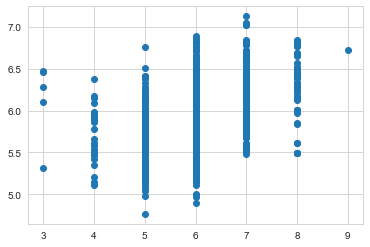

In [39]:
plt.scatter(ym5_test,predictions_m5)

**Residual Histogram**

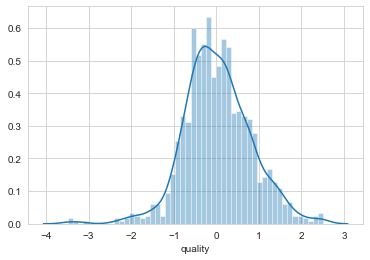

In [40]:
sns.distplot((ym5_test-predictions_m5),bins=50);

In [41]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym5_test, predictions_m5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym5_test, predictions_m5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym5_test, predictions_m5)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym5_test, predictions_m5))
print('Explained Variance:', metrics.explained_variance_score(ym5_test, predictions_m5))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym5_test, predictions_m5))
print('Median Absolute Error:', metrics.median_absolute_error(ym5_test, predictions_m5))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym5_test, predictions_m5))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym5_test, predictions_m5))



R-squared: 0.21043329047593606
Mean Squared Error (MSE): 0.6245489626102649
Root Mean Squared Error (RMSE): 0.7902841024658569
Log Mean Squared Error: 0.013493060083401759
Explained Variance: 0.21151837739019141
Mean Absolute Error (MAE): 0.6061407667264131
Median Absolute Error: 0.4877097578174192
Poisson Deviance: 0.10576701329726354
Mean Gamma Deviance: 0.01823373450787557



## Model 6: Drop Residual Sugar



In [42]:
ym6 = df.quality
Xm6 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar'],axis=1)
from sklearn.model_selection import train_test_split
Xm6_train, Xm6_test, ym6_train, ym6_test = train_test_split(Xm6, ym6, test_size=0.25, random_state=101)
Xm6_train.head()


,volatile_acidity,citric_acid,chlorides,pH,sulphates,alcohol
2133,0.24,0.27,0.030,2.99,0.68,11.9
4628,0.19,0.37,0.041,3.18,0.50,10.9
176,0.32,0.47,0.044,3.03,0.41,12.6
4545,0.25,0.53,0.021,3.19,0.31,13.0
1480,0.08,0.49,0.050,3.46,0.44,10.2


In [43]:
Xm6_train.shape

(2963, 6)

In [44]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(Xm6_train,ym6_train)
print('Estimated intercept coefficient:',lm6.intercept_)
print ('Number of coefficients:', len(lm6.coef_))
coeffm6_df = pd.DataFrame(lm6.coef_,Xm6.columns,columns=['Coefficient'])
coeffm6_df


Estimated intercept coefficient: 2.8406531564015265
Number of coefficients: 6


,Coefficient
volatile_acidity,-1.753121
citric_acid,0.059103
chlorides,-6.597863
pH,0.224309
sulphates,0.295784
alcohol,0.280329


In [45]:
predictions_m6 = lm6.predict(Xm6_test)

**Predicted vs. Actual**

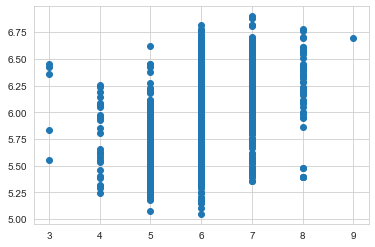

In [46]:
plt.scatter(ym6_test,predictions_m6)

**Residual Histogram**

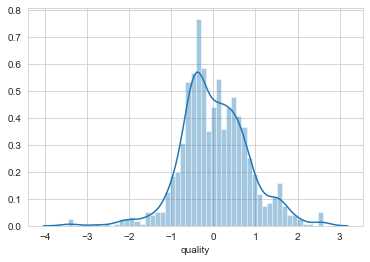

In [47]:
sns.distplot((ym6_test-predictions_m6),bins=50);

In [48]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym6_test, predictions_m6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym6_test, predictions_m6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym6_test, predictions_m6)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym6_test, predictions_m6))
print('Explained Variance:', metrics.explained_variance_score(ym6_test, predictions_m6))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym6_test, predictions_m6))
print('Median Absolute Error:', metrics.median_absolute_error(ym6_test, predictions_m6))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym6_test, predictions_m6))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym6_test, predictions_m6))



R-squared: 0.1907576952324218
Mean Squared Error (MSE): 0.6401124006957987
Root Mean Squared Error (RMSE): 0.8000702473506928
Log Mean Squared Error: 0.013816732184869297
Explained Variance: 0.19233414519459358
Mean Absolute Error (MAE): 0.6169493036705781
Median Absolute Error: 0.49075823880649194
Poisson Deviance: 0.10852076116457701
Mean Gamma Deviance: 0.01872224826336616


## Model 7: Drop Citric Acid

In [49]:
ym7 = df.quality
Xm7 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid'],axis=1)
from sklearn.model_selection import train_test_split
Xm7_train, Xm7_test, ym7_train, ym7_test = train_test_split(Xm7, ym7, test_size=0.25, random_state=101)
Xm7_train.head()


,volatile_acidity,chlorides,pH,sulphates,alcohol
2133,0.24,0.030,2.99,0.68,11.9
4628,0.19,0.041,3.18,0.50,10.9
176,0.32,0.044,3.03,0.41,12.6
4545,0.25,0.021,3.19,0.31,13.0
1480,0.08,0.050,3.46,0.44,10.2


In [50]:
Xm7_train.shape

(2963, 5)

In [51]:
from sklearn.linear_model import LinearRegression
lm7 = LinearRegression()
lm7.fit(Xm7_train,ym7_train)
print('Estimated intercept coefficient:',lm7.intercept_)
print ('Number of coefficients:', len(lm7.coef_))
coeffm7_df = pd.DataFrame(lm7.coef_,Xm7.columns,columns=['Coefficient'])
coeffm7_df

Estimated intercept coefficient: 2.869365809328717
Number of coefficients: 5


,Coefficient
volatile_acidity,-1.762278
chlorides,-6.578854
pH,0.220311
sulphates,0.300279
alcohol,0.280573


In [52]:
predictions_m7 = lm7.predict(Xm7_test)

**Predicted vs. Actual**

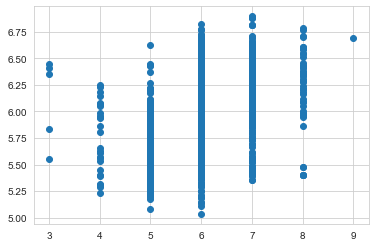

In [53]:
plt.scatter(ym7_test,predictions_m7)

**Residual Histogram**

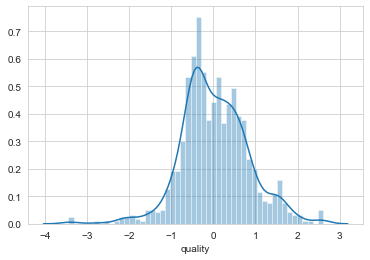

In [54]:
sns.distplot((ym7_test-predictions_m7),bins=50);

In [55]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym7_test, predictions_m7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym7_test, predictions_m7))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym7_test, predictions_m7)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym7_test, predictions_m7))
print('Explained Variance:', metrics.explained_variance_score(ym7_test, predictions_m7))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym7_test, predictions_m7))
print('Median Absolute Error:', metrics.median_absolute_error(ym7_test, predictions_m7))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym7_test, predictions_m7))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym7_test, predictions_m7))


R-squared: 0.19091321448217657
Mean Squared Error (MSE): 0.639989384635308
Root Mean Squared Error (RMSE): 0.799993365369556
Log Mean Squared Error: 0.013813527093542308
Explained Variance: 0.19247870689801827
Mean Absolute Error (MAE): 0.6168212448977108
Median Absolute Error: 0.4933058752160684
Poisson Deviance: 0.1085003044382067
Mean Gamma Deviance: 0.018718805669033032


## Model 8: Drop Alcohol

In [56]:
ym8 = df.quality
Xm8 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol'],axis=1)
from sklearn.model_selection import train_test_split
Xm8_train, Xm8_test, ym8_train, ym8_test = train_test_split(Xm8, ym8, test_size=0.25, random_state=101)
Xm8_train.head()

,volatile_acidity,chlorides,pH,sulphates
2133,0.24,0.030,2.99,0.68
4628,0.19,0.041,3.18,0.50
176,0.32,0.044,3.03,0.41
4545,0.25,0.021,3.19,0.31
1480,0.08,0.050,3.46,0.44


In [57]:
Xm8_train.shape

(2963, 4)

In [58]:
from sklearn.linear_model import LinearRegression
lm8 = LinearRegression()
lm8.fit(Xm8_train,ym8_train)
print('Estimated intercept coefficient:',lm8.intercept_)
print ('Number of coefficients:', len(lm8.coef_))
coeffm8_df = pd.DataFrame(lm8.coef_,Xm8.columns,columns=['Coefficient'])
coeffm8_df

Estimated intercept coefficient: 5.97338437631953
Number of coefficients: 4


,Coefficient
volatile_acidity,-1.303449
chlorides,-25.130061
pH,0.412052
sulphates,0.135460


In [59]:
predictions_m8 = lm8.predict(Xm8_test)

**Predicted vs. Actual**

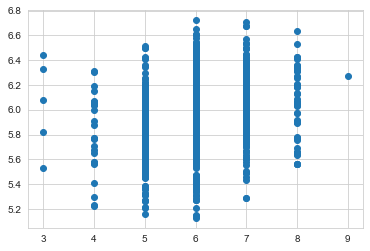

In [60]:
plt.scatter(ym8_test,predictions_m8)

**Residual Histogram**

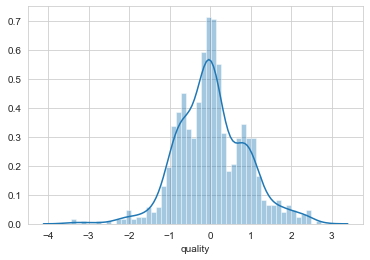

In [61]:
sns.distplot((ym8_test-predictions_m8),bins=50);

In [62]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym8_test, predictions_m8))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym8_test, predictions_m8))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym8_test, predictions_m8)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym8_test, predictions_m8))
print('Explained Variance:', metrics.explained_variance_score(ym8_test, predictions_m8))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym8_test, predictions_m8))
print('Median Absolute Error:', metrics.median_absolute_error(ym8_test, predictions_m8))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym8_test, predictions_m8))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym8_test, predictions_m8))


R-squared: 0.08978251902667234
Mean Squared Error (MSE): 0.7199839818908863
Root Mean Squared Error (RMSE): 0.8485186986100461
Log Mean Squared Error: 0.015413587480911088
Explained Variance: 0.09112734095674879
Mean Absolute Error (MAE): 0.6418382094053332
Median Absolute Error: 0.5661241667398942
Poisson Deviance: 0.1217216862762412
Mean Gamma Deviance: 0.020907768112248516


## Model 9: Drop pH

In [63]:
ym9 = df.quality
Xm9 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH'],axis=1)
from sklearn.model_selection import train_test_split
Xm9_train, Xm9_test, ym9_train, ym9_test = train_test_split(Xm9, ym9, test_size=0.25, random_state=101)
Xm9_train.head()


,volatile_acidity,chlorides,sulphates
2133,0.24,0.030,0.68
4628,0.19,0.041,0.50
176,0.32,0.044,0.41
4545,0.25,0.021,0.31
1480,0.08,0.050,0.44


In [64]:
Xm9_train.shape

(2963, 3)

In [65]:
from sklearn.linear_model import LinearRegression
lm9 = LinearRegression()
lm9.fit(Xm9_train,ym9_train)
print('Estimated intercept coefficient:',lm9.intercept_)
print ('Number of coefficients:', len(lm9.coef_))
coeffm9_df = pd.DataFrame(lm9.coef_,Xm9.columns,columns=['Coefficient'])
coeffm9_df


Estimated intercept coefficient: 7.268238645177509
Number of coefficients: 3


,Coefficient
volatile_acidity,-1.336643
chlorides,-25.300166
sulphates,0.210481


In [66]:
predictions_m9 = lm9.predict(Xm9_test)

**Predicted vs. Actual**

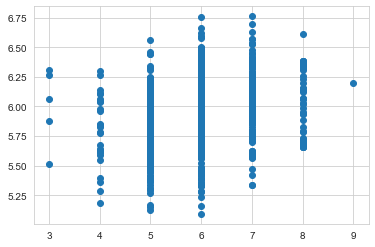

In [67]:
plt.scatter(ym9_test,predictions_m9)

**Residual Histogram**

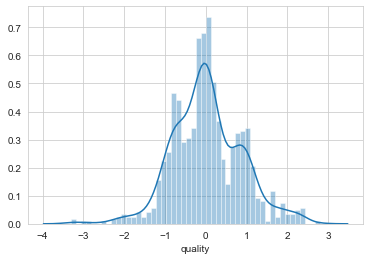

In [68]:
sns.distplot((ym9_test-predictions_m9),bins=50);

In [69]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym9_test, predictions_m9))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym9_test, predictions_m9))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym9_test, predictions_m9)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym9_test, predictions_m9))
print('Explained Variance:', metrics.explained_variance_score(ym9_test, predictions_m9))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym9_test, predictions_m9))
print('Median Absolute Error:', metrics.median_absolute_error(ym9_test, predictions_m9))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym9_test, predictions_m9))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym9_test, predictions_m9))


R-squared: 0.09508133640697503
Mean Squared Error (MSE): 0.7157926059653181
Root Mean Squared Error (RMSE): 0.846045274181777
Log Mean Squared Error: 0.015319337786759637
Explained Variance: 0.09612602814192206
Mean Absolute Error (MAE): 0.6406698919769425
Median Absolute Error: 0.5748480944619621
Poisson Deviance: 0.12097364416155418
Mean Gamma Deviance: 0.020774087905372798


## Model 10: Drop Sulphates

In [70]:
ym10 = df.quality
Xm10 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm10_train, Xm10_test, ym10_train, ym10_test = train_test_split(Xm10, ym10, test_size=0.25, random_state=101)
Xm10_train.head()


,volatile_acidity,chlorides
2133,0.24,0.030
4628,0.19,0.041
176,0.32,0.044
4545,0.25,0.021
1480,0.08,0.050


In [71]:
Xm10_train.shape

(2963, 2)

In [72]:
from sklearn.linear_model import LinearRegression
lm10 = LinearRegression()
lm10.fit(Xm10_train,ym10_train)
print('Estimated intercept coefficient:',lm10.intercept_)
print ('Number of coefficients:', len(lm10.coef_))
coeffm10_df = pd.DataFrame(lm10.coef_,Xm10.columns,columns=['Coefficient'])
coeffm10_df

Estimated intercept coefficient: 7.365048082034636
Number of coefficients: 2


,Coefficient
volatile_acidity,-1.342949
chlorides,-25.151890


In [73]:
predictions_m10 = lm10.predict(Xm10_test)

**Predicted vs. Actual**

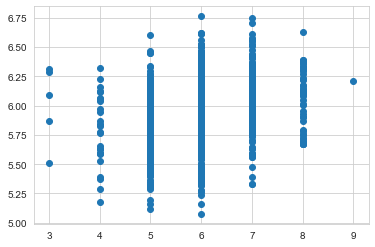

In [74]:
plt.scatter(ym10_test,predictions_m10)

**Residual Histogram**

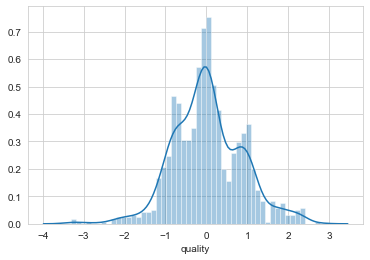

In [75]:
sns.distplot((ym10_test-predictions_m10),bins=50);

In [76]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym10_test, predictions_m10))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym10_test, predictions_m10))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym10_test, predictions_m10)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym10_test, predictions_m10))
print('Explained Variance:', metrics.explained_variance_score(ym10_test, predictions_m10))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym10_test, predictions_m10))
print('Median Absolute Error:', metrics.median_absolute_error(ym10_test, predictions_m10))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym10_test, predictions_m10))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym10_test, predictions_m10))


R-squared: 0.09292474158152275
Mean Squared Error (MSE): 0.7174984771029435
Root Mean Squared Error (RMSE): 0.8470528183666846
Log Mean Squared Error: 0.015355576926673742
Explained Variance: 0.09394553407527717
Mean Absolute Error (MAE): 0.6418781796866962
Median Absolute Error: 0.5723647041892175
Poisson Deviance: 0.12123899531067768
Mean Gamma Deviance: 0.020815263301943086


## Model 11: Drop Volatile Activity

In [77]:
ym11 = df.quality
Xm11 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates','volatile_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm11_train, Xm11_test, ym11_train, ym11_test = train_test_split(Xm11, ym11, test_size=0.25, random_state=101)
Xm11_train.head()


,chlorides
2133,0.030
4628,0.041
176,0.044
4545,0.021
1480,0.050


In [78]:
Xm11_train.shape

(2963, 1)

In [79]:
from sklearn.linear_model import LinearRegression
lm11 = LinearRegression()
lm11.fit(Xm11_train,ym11_train)
print('Estimated intercept coefficient:',lm11.intercept_)
print ('Number of coefficients:', len(lm11.coef_))
coeffm11_df = pd.DataFrame(lm11.coef_,Xm11.columns,columns=['Coefficient'])
coeffm11_df

Estimated intercept coefficient: 6.991562201802383
Number of coefficients: 1


,Coefficient
chlorides,-24.702768


In [80]:
predictions_m11 = lm11.predict(Xm11_test)

**Predicted vs. Actual**

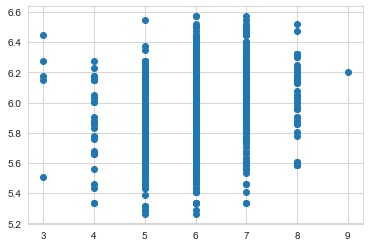

In [81]:
plt.scatter(ym11_test,predictions_m11)

**Residual Histogram**

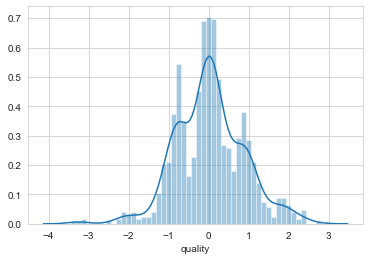

In [82]:
sns.distplot((ym11_test-predictions_m11),bins=50);

In [83]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym11_test, predictions_m11))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym11_test, predictions_m11))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym11_test, predictions_m11)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym11_test, predictions_m11))
print('Explained Variance:', metrics.explained_variance_score(ym11_test, predictions_m11))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym11_test, predictions_m11))
print('Median Absolute Error:', metrics.median_absolute_error(ym11_test, predictions_m11))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym11_test, predictions_m11))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym11_test, predictions_m11))


R-squared: 0.07741249437917419
Mean Squared Error (MSE): 0.7297686979482735
Root Mean Squared Error (RMSE): 0.8542650045204202
Log Mean Squared Error: 0.01568583160182278
Explained Variance: 0.07848580477149314
Mean Absolute Error (MAE): 0.645688783626505
Median Absolute Error: 0.5835044411226473
Poisson Deviance: 0.12342239848659112
Mean Gamma Deviance: 0.021203021934860757
